In [2]:
import yfinance as yf

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split 

In [4]:
df = yf.download("BTC-USD")

[*********************100%***********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2021-01-09,40788.640625,41436.351562,38980.875000,40254.546875,40254.546875,61984162837
2021-01-10,40254.218750,41420.191406,35984.628906,38356.441406,38356.441406,79980747690
2021-01-11,38346.531250,38346.531250,30549.599609,35566.656250,35566.656250,123320567398


In [6]:
df.reset_index(inplace=True)

In [7]:
df = df[["Date", "Close"]]

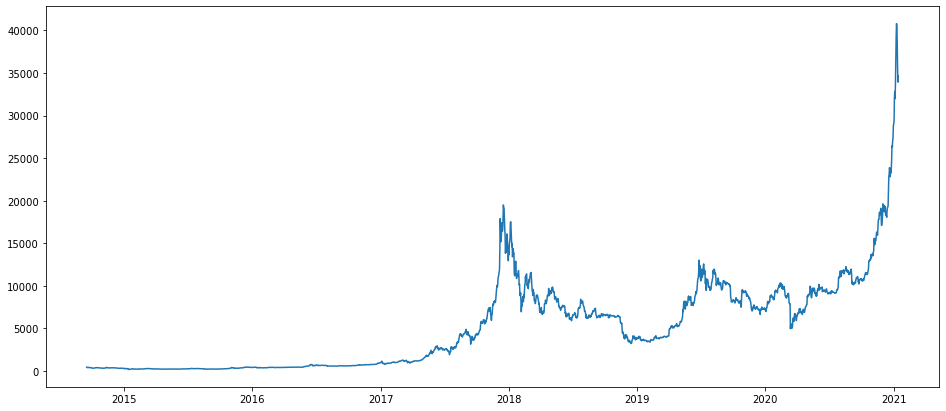

In [8]:
plt.figure(figsize=(16,7))
plt.plot(df["Date"], df["Close"])

In [9]:
#Create Sequences of 15 days and predict the price on 16Th day
# [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15] -> [16]

In [10]:
#Standardize our data
df["Close"] = (df["Close"] - df["Close"].mean()) / df["Close"].std()

<ipython-input-10-ff90c76a774b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Close"] = (df["Close"] - df["Close"].mean()) / df["Close"].std()


In [11]:
df["Close"]

0      -0.871053
1      -0.877216
2      -0.882771
3      -0.880127
4      -0.882017
          ...   
2306    6.585953
2307    6.230295
2308    5.707559
2309    5.399572
2310    5.529053
Name: Close, Length: 2311, dtype: float64

In [12]:
#Train
#Validation
#Test - Never show this one to the model only to make predictions

from sklearn.model_selection import train_test_split

x_train, x_val = train_test_split(df["Close"], test_size=0.2, shuffle=False)
x_val, x_test = train_test_split(x_val, test_size=0.4, shuffle=False)

In [13]:
x_train

0      -0.871053
1      -0.877216
2      -0.882771
3      -0.880127
4      -0.882017
          ...   
1843    0.580843
1844    0.570642
1845    0.540035
1846    0.588278
1847    0.585123
Name: Close, Length: 1848, dtype: float64

In [14]:
x_val

1848    0.653882
1849    0.652145
1850    0.602544
1851    0.605317
1852    0.602403
          ...   
2120    0.776900
2121    0.809889
2122    0.781714
2123    0.781871
2124    0.774665
Name: Close, Length: 277, dtype: float64

In [15]:
x_test

2125    0.781439
2126    0.775277
2127    0.775202
2128    0.765763
2129    0.754406
          ...   
2306    6.585953
2307    6.230295
2308    5.707559
2309    5.399572
2310    5.529053
Name: Close, Length: 186, dtype: float64

In [16]:
window_size = 15
batch_size =32
shuffle_buffer = x_train.shape[0]

In [17]:
def window_ds(series, window_size, batch_size, shuffle_buffer):
    ds= tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size +1))
    ds = ds.shuffle(shuffle_buffer).map(lambda w: (w[:-1], w[-1]))
    ds= ds.batch(batch_size).prefetch(1)
    return ds
        

In [18]:
x_train_ds = window_ds(x_train, window_size,batch_size, shuffle_buffer)
x_val_ds = window_ds(x_train, window_size,batch_size, x_val.shape[0])

In [19]:
for i in x_train_ds:
    print(i)

(<tf.Tensor: shape=(32, 15), dtype=float64, numpy=
array([[ 0.94697765,  0.9429597 ,  0.98648745,  0.95176304,  0.87098992,
         0.82522868,  0.84171275,  0.84780061,  0.8716547 ,  0.98197928,
         1.03384083,  1.02839816,  1.02484554,  0.98320509,  1.01392564],
       [ 0.89042588,  0.85232305,  0.79952262,  0.77362936,  0.79056045,
         0.73786322,  0.62497907,  0.63685854,  0.6779032 ,  0.67656339,
         0.63788728,  0.61136437,  0.55992799,  0.58928028,  0.58857012],
       [-0.87253478, -0.87322581, -0.87237419, -0.87082404, -0.87028609,
        -0.86941236, -0.87342256, -0.87261235, -0.87147199, -0.8727422 ,
        -0.87207571, -0.87342593, -0.87237008, -0.87304125, -0.87280628],
       [ 0.3932488 ,  0.34970285,  0.5075745 ,  0.54120851,  0.58069817,
         0.52068965,  0.41931717,  0.40569735,  0.57929688,  0.53819047,
         0.53538332,  0.48230722,  0.52011582,  0.53988855,  0.55210023],
       [-0.17450546, -0.17669029, -0.1437797 , -0.13159465, -0.130549

(<tf.Tensor: shape=(32, 15), dtype=float64, numpy=
array([[-0.9136904 , -0.91227534, -0.91105197, -0.91143253, -0.91172034,
        -0.91137144, -0.91156744, -0.91245466, -0.91235123, -0.91222457,
        -0.91249663, -0.91237503, -0.91306344, -0.91328473, -0.91289668],
       [-0.77142756, -0.76715972, -0.76376635, -0.76133235, -0.76424791,
        -0.76222238, -0.75787529, -0.75755301, -0.77042323, -0.77149295,
        -0.76853692, -0.7695242 , -0.77112419, -0.76851819, -0.76796918],
       [-0.91231731, -0.91231619, -0.9122849 , -0.91226148, -0.91231994,
        -0.91302278, -0.91361395, -0.91497504, -0.91443597, -0.91442266,
        -0.91471309, -0.91459542, -0.91447044, -0.91498348, -0.91393268],
       [-0.89815925, -0.89852145, -0.89674963, -0.89786339, -0.89771667,
        -0.90407806, -0.90724226, -0.90531623, -0.90312113, -0.9015944 ,
        -0.90365328, -0.9023306 , -0.9052559 , -0.90696776, -0.90656753],
       [-0.18053953, -0.24276667, -0.2292253 , -0.23453521, -0.235155

In [20]:
input_layer = tf.keras.layers.Input(shape=[window_size])
l0 = tf.keras.layers.Dense(128, activation="relu")(input_layer)
l1 = tf.keras.layers.Dense(256, activation="relu")(l0)
output_l = tf.keras.layers.Dense(1)(l1)

model = tf.keras.models.Model(inputs=input_layer, outputs=output_l)

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15)]              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 35,329
Trainable params: 35,329
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer="RMSprop", 
             loss="mse",
             metrics="mse")

In [23]:
model.fit(x_train_ds, validation_data=x_val_ds, epochs=100)

Epoch 1/100
58/58 [==============================] - 2s 9ms/step - loss: 0.0578 - mse: 0.0578 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 2/100
58/58 [==============================] - 0s 4ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 3/100
58/58 [==============================] - 0s 4ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 4/100
58/58 [==============================] - 0s 4ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 5/100
58/58 [==============================] - 0s 4ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 6/100
58/58 [==============================] - 0s 4ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 7/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 8/100
58/58 [==============================] - 0s 4ms/step - loss: 0.0058 - m

58/58 [==============================] - 0s 4ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 64/100
58/58 [==============================] - 0s 4ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 65/100
58/58 [==============================] - 0s 4ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 66/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 67/100
58/58 [==============================] - 0s 4ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 68/100
58/58 [==============================] - 0s 4ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 69/100
58/58 [==============================] - 0s 4ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 70/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0031 - mse: 0

In [24]:
x_test = x_test.to_numpy()

In [46]:
forecast = []
buys = {}
sells = {}

for i in range(0, len(x_test) - window_size, window_size):
    f = model.predict(x_test[i:i+window_size][np.newaxis])[0][0]

    if f > x_test[window_size]:
        buys.update({i+window_size:x_test[i+window_size]})
    elif f < x_test[window_size]:
        sells.update({i+window_size:x_test[i+window_size]})
    
    

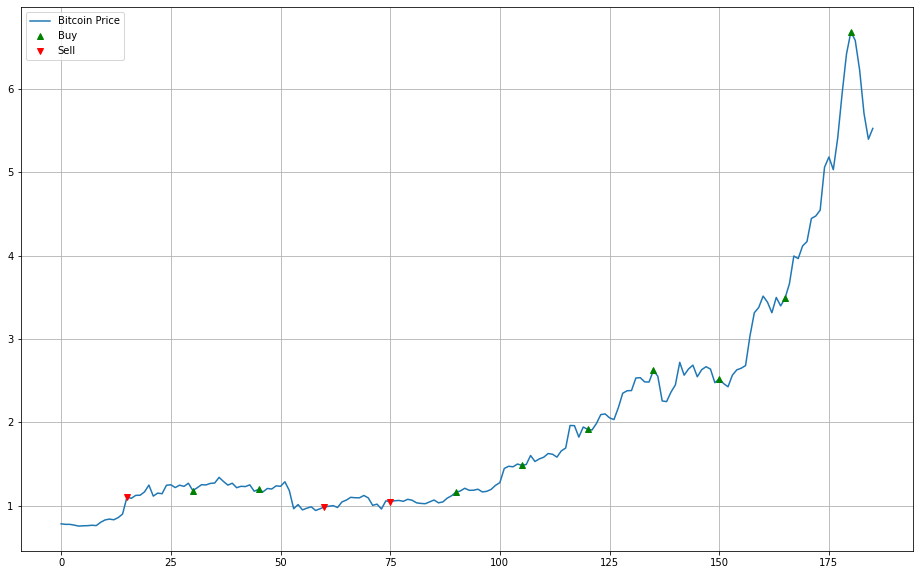

In [47]:
plt.figure(figsize=(16, 10))
plt.plot(x_test, label="Bitcoin Price")
plt.plot(forecast, label="")
plt.plot(list(buys.keys()), list(buys.values()), "^", color="g", label="Buy")
plt.plot(list(sells.keys()), list(sells.values()), "v", color="r", label="Sell")
plt.legend()
plt.grid(True)